## Контрольная 1

In [415]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

>### Задние 1

\begin{equation}
    \begin{gathered}
        \frac{dy(x)}{dx}=f(x,y),
        \\
        y(0)=y_0
    \end{gathered}
\end{equation}
Метод Эйлера с пересчётом:
\begin{equation}
    \begin{gathered}
        y^{*}_{i+1}=y_i+hf(x_i,y_i),
        \\
        y_{i+1}=y_i+\frac{h}{2}(f(x_i,y_i)+f(x_{i+1}, y^{*}_{i+1}))
    \end{gathered}
\end{equation}
Выразим $y^{*}_{i+1}$ и подставим во второе уравнение:
$$
    y_{i+1}=y_i+\frac{h}{2}(f(x_i,y_i)+f(x_{i+1}, y_i+hf(x_i,y_i)))
$$
$$
    2\frac{y_{i+1} - y_i}{h}=f(x_i,y_i)+f(x_{i+1}, y_i+hf(x_i,y_i)
$$
$$
    2y^{'}_i+hy^{''}_i+o(h)=2f(x_i,y_i)+\frac{\partial f(x_i, y_i)}{\partial x}h + \frac{\partial f(x_i, y_i)}{\partial y}hf(x_i,y_i)+o(h)
$$
$$
    y^{'}_i=f(x_i,y_i)+\frac{h}{2}(\frac{\partial f(x_i, y_i)}{\partial x} + \frac{\partial f(x_i, y_i)}{\partial y}f(x_i,y_i)-y^{''}_i)+o(h)
$$
$$
    y^{'}_i=f(x_i, y_i)+o(h)
$$
Значит, первый порядок аппроксимации

In [416]:
def fit(N, h, lam, U0):
    U = np.zeros(N)
    U[0] = U0
    for i in range(0, N - 1):
        U_star = U[i] + h * lam * U[i]
        U[i + 1] = U[i] + h * (lam * U[i] + lam * U_star) / 2
    return U

In [417]:
def err(N, L, lam, y0):
    n = np.array(range(N)) + 100
    error = np.zeros(N)
    for i in range(N):
        x = np.linspace(0, L, n[i])
        sum = L / n[i] * np.abs(fit(n[i], L / n[i], lam, y0) - np.exp(lam * x))
        error[i] = sum.sum()
    return error, n

In [418]:
L = 1000
N = 500
h = L / N
y0 = 1
lam = -0.01

In [419]:
y = fit(N, h, lam, y0)
approx, n = err(N, L, lam, y0)

1.0655836765185982


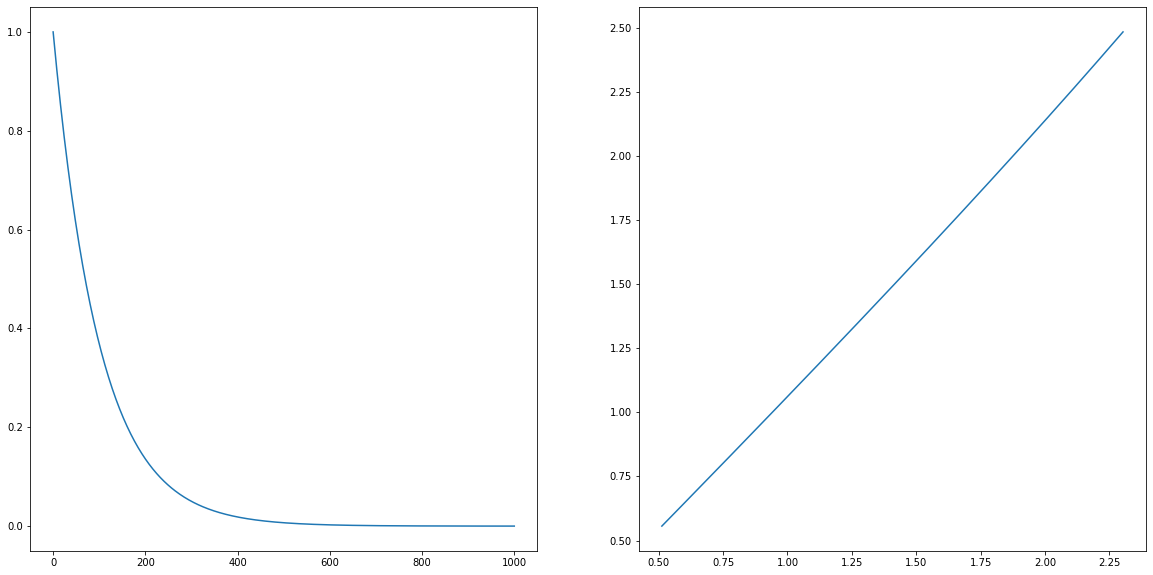

In [420]:
x = np.linspace(0, L, N)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.subplot(1, 2, 2)
k, e = np.polyfit(np.log(L / n), np.log(approx), deg=1, cov=True)
plt.plot(np.log(L / n), np.log(approx) - k[1])
print(k[0])

>### Задание 3

In [421]:
def D1_solver(h, N, M, lam, tau, Q_0):
    Q = Q_0.copy()
    Q_new = np.zeros_like(Q)
    for j in range(M):
        for i in range (N):
            if lam > 0:
                x_star = -lam * tau
                b = Q[i]
                a = (Q[i - 1] - b) / (-h)
                Q_new[i] = a * x_star + b
            else:
                x_star = -lam * tau
                b = Q[i - 1]
                a = (Q[i] - b) / h
                Q_new[i - 1] = a * x_star + b
        Q = Q_new
    return Q_new

In [422]:
L = 100
N = 2000
h = L / N
lam = 1
tau = h / lam / 100

In [423]:
def init(L, h, N, s, e):
    U = np.zeros(N)
    for i in range(N):
        U[i] = np.sin(20 * np.pi / L * (i * h))
    return U

In [424]:
w1 = init(L, h, N, 2, 4)
w2 = init(L, h, N, 7, 9)

MovieWriter imagemagick unavailable; using Pillow instead.


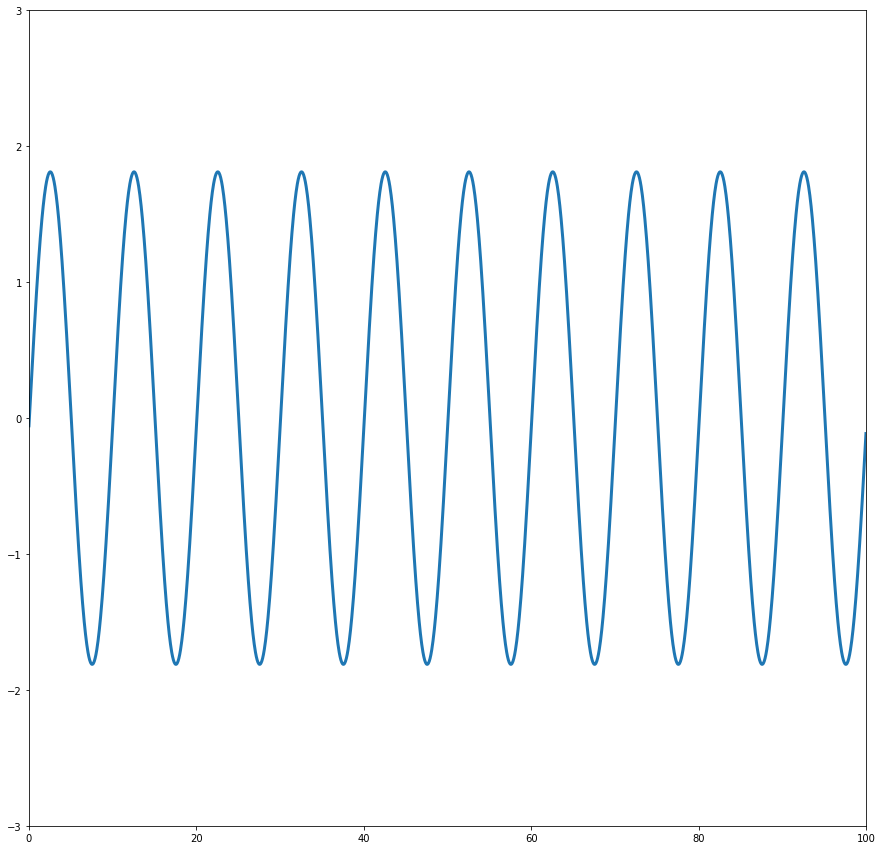

In [425]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(xlim=(0, L), ylim=(-3, 3))
line, = ax.plot([], [], lw=3)
 
def init():
    line.set_data([], [])
    return line,
def animate(i):
    T = i / 10.0
    M = round(T / tau)
    w1_new = D1_solver(h, N, M, lam, tau, w1)
    w2_new = D1_solver(h, N, M, -lam, tau, w2)
    x = np.linspace(0, L, N)
    interf = w1_new + w2_new
    line.set_data(x, interf)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=200, blit=True)
anim.save('sine_wave.gif', writer='imagemagick')